<a href="https://colab.research.google.com/github/gonza77/Pet_Store_sell_analysis/blob/main/Pet_Store_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* count our total unique customers and unique by product categorie
* sum our total sales by product and graph 
* What's our customer average and median age?
* How are our total sales distibuted above and below our customer median age?
* What State do we have more customers?
* How's out total sales distributed by state? which states are the ones with   more sales?



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving inu_neko_orderline_clean.csv to inu_neko_orderline_clean.csv


In [ ]:
df = pd.read_csv("inu_neko_orderline_clean.csv", encoding='utf-8')

In [ ]:
df.head()

,trans_id,prod_upc,cust_id,trans_timestamp,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,cust_state,prod_price,prod_title,prod_category,prod_animal_type,total_sales
0,10300097,719638485153,1001019,2021-01-01 07:35:21.439873,2021,1,1,1,1,20,New York,72.99,Cat Cave,bedding,cat,72.99
1,10300093,73201504044,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Purrfect Puree,treat,cat,18.95
2,10300093,719638485153,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,72.99,Cat Cave,bedding,cat,72.99
3,10300093,441530839394,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,2,34,New York,28.45,Ball and String,toy,cat,56.90
4,10300093,733426809698,1001015,2021-01-01 09:33:37.499660,2021,1,1,1,1,34,New York,18.95,Yum Fish-Dish,food,cat,18.95


In [ ]:
df.shape

(38223, 16)

In [ ]:
# Average Customers age is 30 and median is 29
df.describe()

,trans_id,prod_upc,cust_id,trans_year,trans_month,trans_day,trans_hour,trans_quantity,cust_age,prod_price,total_sales
count,3.822300e+04,3.822300e+04,3.822300e+04,38223.0,38223.000000,38223.000000,38223.000000,38223.000000,38223.000000,38223.000000,38223.000000
mean,1.031407e+07,5.004289e+11,1.010657e+06,2021.0,4.611124,16.615964,16.615964,1.374277,30.062109,30.541081,42.107863
std,8.076082e+03,2.586271e+11,6.117267e+03,0.0,1.387674,8.721896,8.721896,0.713710,6.956725,18.729653,36.614296
min,1.030009e+07,7.320150e+10,1.001012e+06,2021.0,1.000000,1.000000,1.000000,1.000000,18.000000,9.950000,9.950000
25%,1.030707e+07,3.445389e+11,1.005254e+06,2021.0,4.000000,9.000000,9.000000,1.000000,25.000000,18.950000,18.950000
50%,1.031407e+07,4.697572e+11,1.010222e+06,2021.0,5.000000,17.000000,17.000000,1.000000,29.000000,21.950000,32.910000
75%,1.032106e+07,7.196385e+11,1.015806e+06,2021.0,6.000000,24.000000,24.000000,2.000000,34.000000,45.990000,54.950000
max,1.032811e+07,9.695689e+11,1.022252e+06,2021.0,6.000000,31.000000,31.000000,8.000000,79.000000,72.990000,510.930000


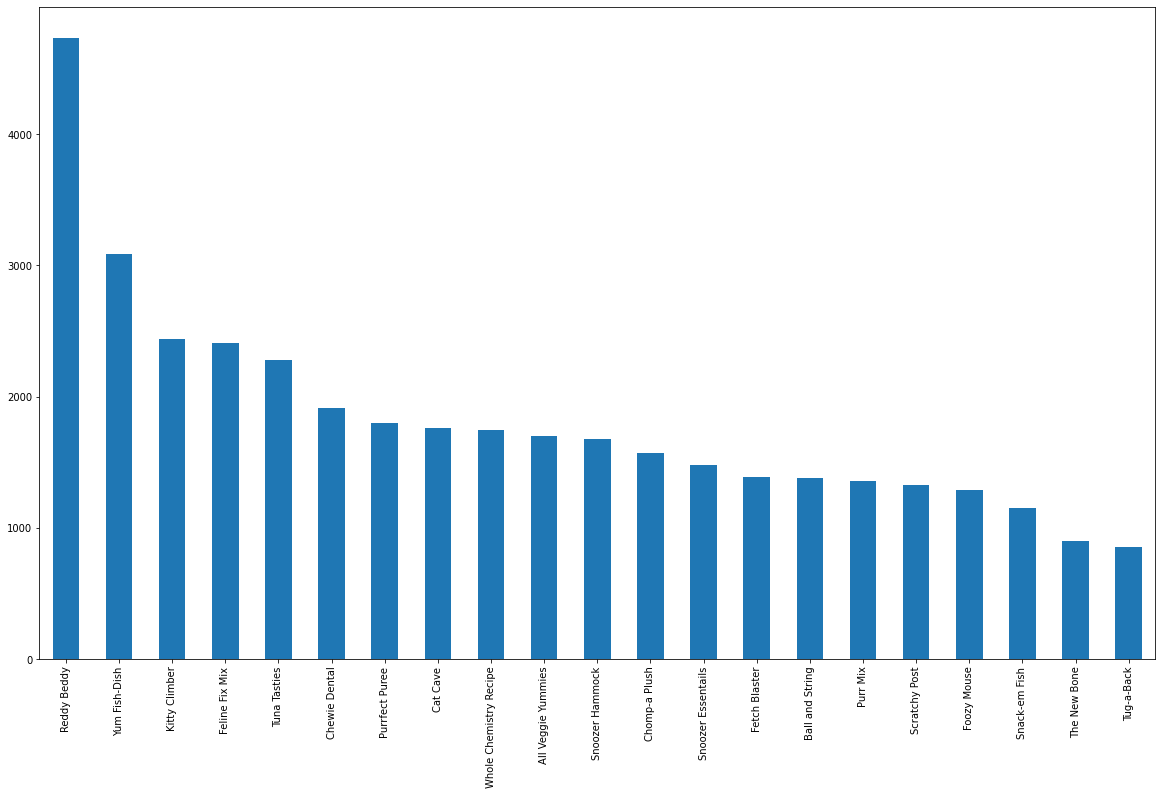

In [ ]:
#Products more wanted by our customers by customers counts 

counts = df['prod_title'].value_counts()
counts.plot(kind='bar', figsize = (20,12))
plt.show()

In [ ]:
# Group the data by prod_title and sum the total_sales column

sales_by_title = df.groupby("prod_title")["total_sales"].sum()
sales_by_title.sort_values( ascending=False)


prod_title
Reddy Beddy               408023.09
Cat Cave                  175759.92
Kitty Climber             119810.71
Snoozer Hammock           106282.89
Snoozer Essentails        100739.10
Yum Fish-Dish              81447.10
Scratchy Post              65951.34
Feline Fix Mix             65207.38
Foozy Mouse                61460.37
Tuna Tasties               58782.90
Ball and String            53628.25
Fetch Blaster              47355.10
Purrfect Puree             46484.35
Chomp-a Plush              46402.30
Whole Chemistry Recipe     31257.70
Chewie Dental              28291.63
Tug-a-Back                 26484.48
Snack-em Fish              25344.15
Purr Mix                   24369.24
All Veggie Yummies         22845.20
The New Bone               13561.66
Name: total_sales, dtype: float64

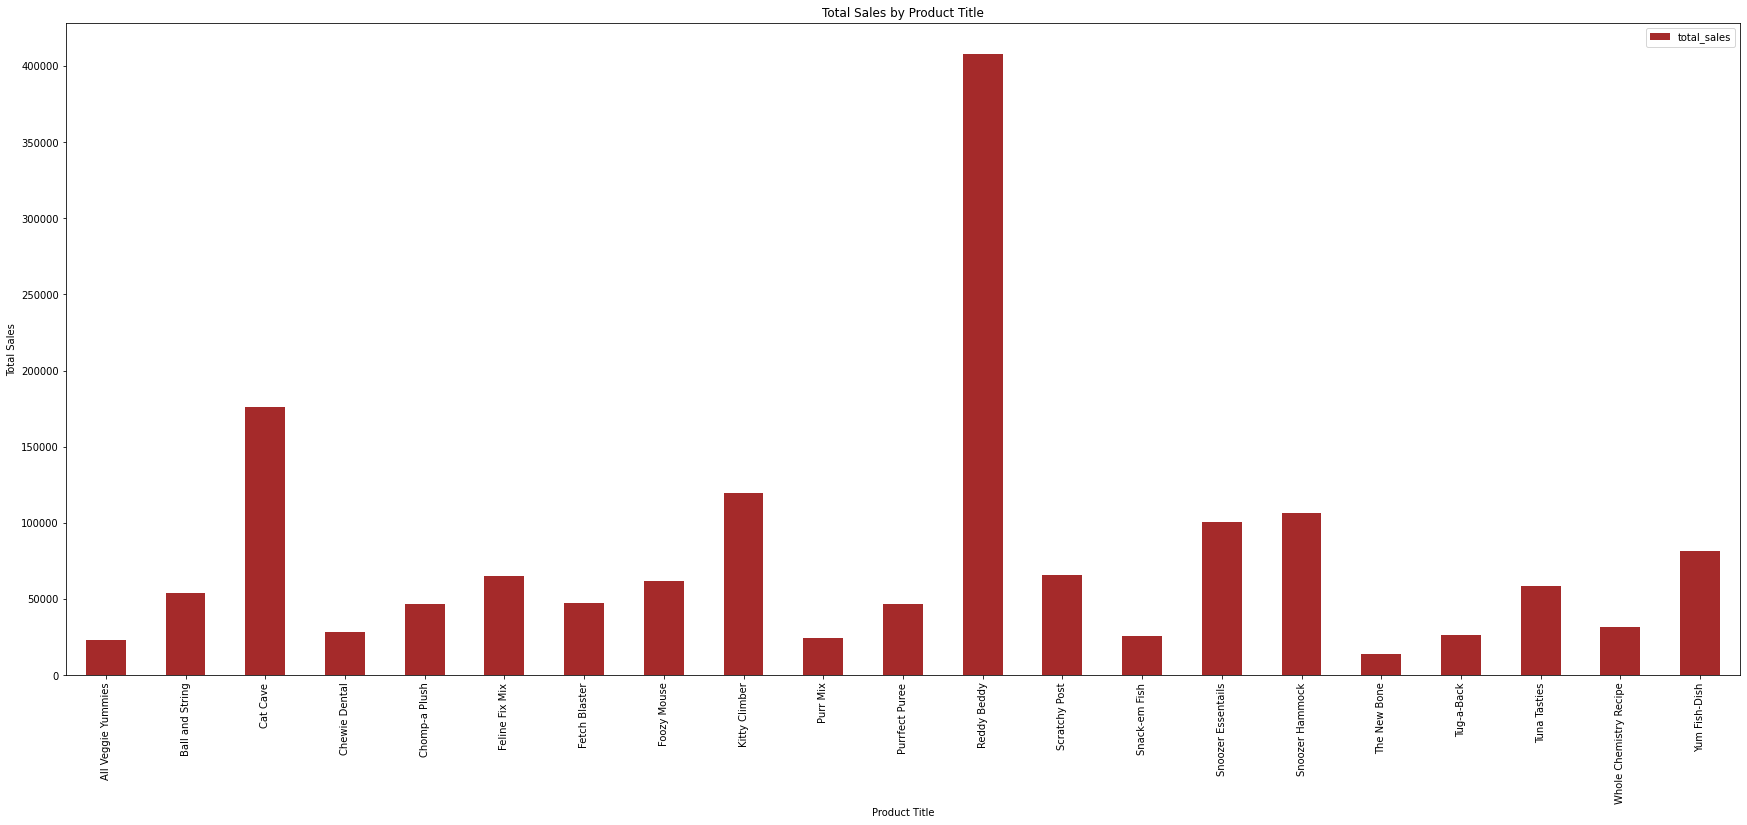

In [ ]:
# Sum of Total Sales group by product 

sales_by_title.plot.bar(x="prod_title", y="total_sales", figsize = (30,12), legend = True, color = "brown")

# Add a title and labels to the axes
plt.title("Total Sales by Product Title")
plt.xlabel("Product Title")
plt.ylabel("Total Sales")

# Display the plot
plt.show()

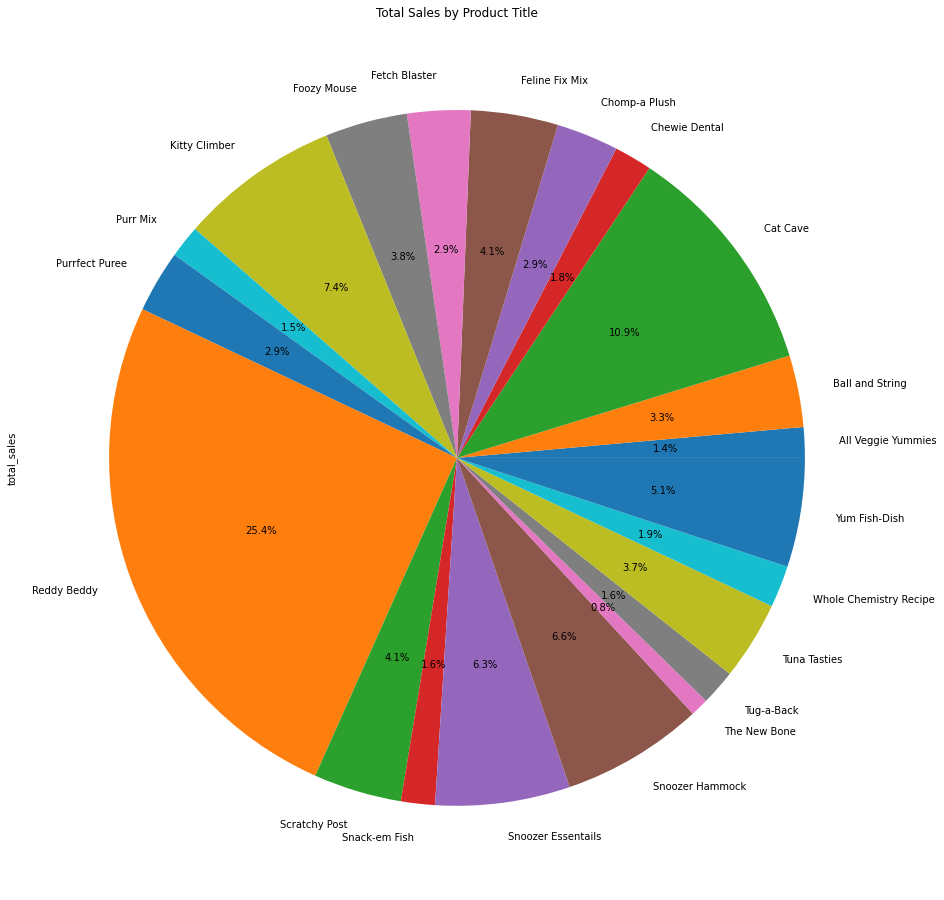

In [ ]:
# Create a pie chart with percentage,  Sum of Total Sales group by product 

sales_by_title.plot.pie(y="total_sales", autopct="%.1f%%", legend = False, figsize = (22,16))

# Add a title
plt.title("Total Sales by Product Title")

# Display the plot
plt.show()

In [ ]:
#30 is our customer average age and 29 is median age (percentile 50)?
#How are our total sales distibuted above and below our customer median age?
# create a new column to explore
df['over_30'] = df['cust_age'] >= 30


In [ ]:
# let's see how much they buy under and over that Age
sales_by_age = df.groupby('over_30')['total_sales'].sum()
sales_by_age

over_30
False    874245.92
True     735242.94
Name: total_sales, dtype: float64

In [ ]:
#As a percentage
percentage = sales_by_age[True] / sales_by_age.sum()
percentage

0.4568176632176255

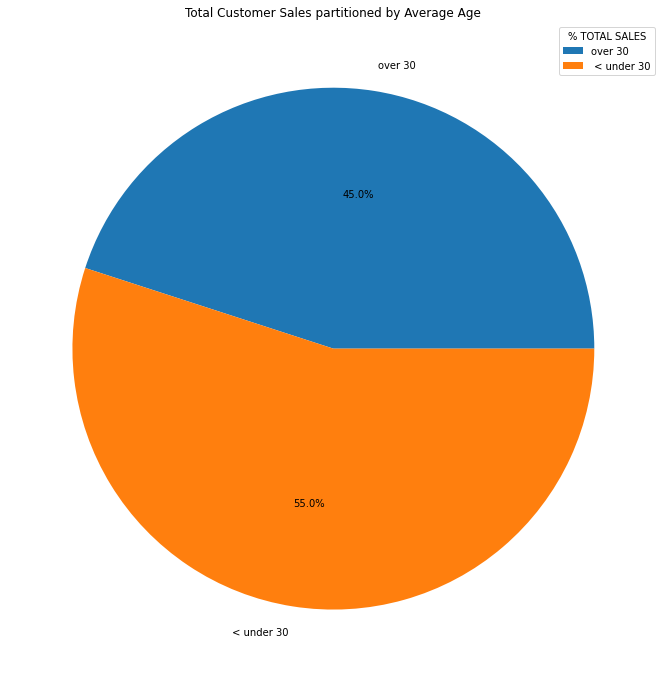

In [ ]:
# Let's graph it
# Create a Series with the labels for the pie chart
labels = ['over 30', ' < under 30']

# Create a pie chart
ax = pd.Series([0.45, 0.55], index=labels).plot.pie(figsize=(16, 12), title='Total Customer Sales partitioned by Average Age', autopct="%.1f%%")
ax.set_ylabel('')
plt.legend(title='% TOTAL SALES')
plt.show()

In [ ]:

# Count states with most unique customers
state_counts = df.groupby("cust_state")["cust_id"].nunique().sort_values(ascending=False)


state_counts

cust_state
New York                5715
Pennsylvania            3696
New Jersey              2645
California              1170
Connecticut             1040
Texas                    836
Florida                  579
Ohio                     357
Illinois                 344
Georgia                  301
North Carolina           291
Michigan                 275
Virginia                 255
Arizona                  235
Massachusetts            208
Washington               205
Indiana                  201
Tennessee                191
Colorado                 174
Missouri                 173
Maryland                 162
South Carolina           161
Wisconsin                156
Minnesota                152
Alabama                  146
Kentucky                 135
Oregon                   133
Louisiana                131
Oklahoma                 108
Arkansas                  96
Utah                      94
Iowa                      92
Kansas                    87
Mississippi               86
Nev

In [ ]:
# convert state counts to a dataframe
state_counts = state_counts.reset_index()

In [ ]:
state_counts

,cust_state,cust_id
0,New York,5715
1,Pennsylvania,3696
2,New Jersey,2645
3,California,1170
4,Connecticut,1040
5,Texas,836
6,Florida,579
7,Ohio,357
8,Illinois,344
9,Georgia,301


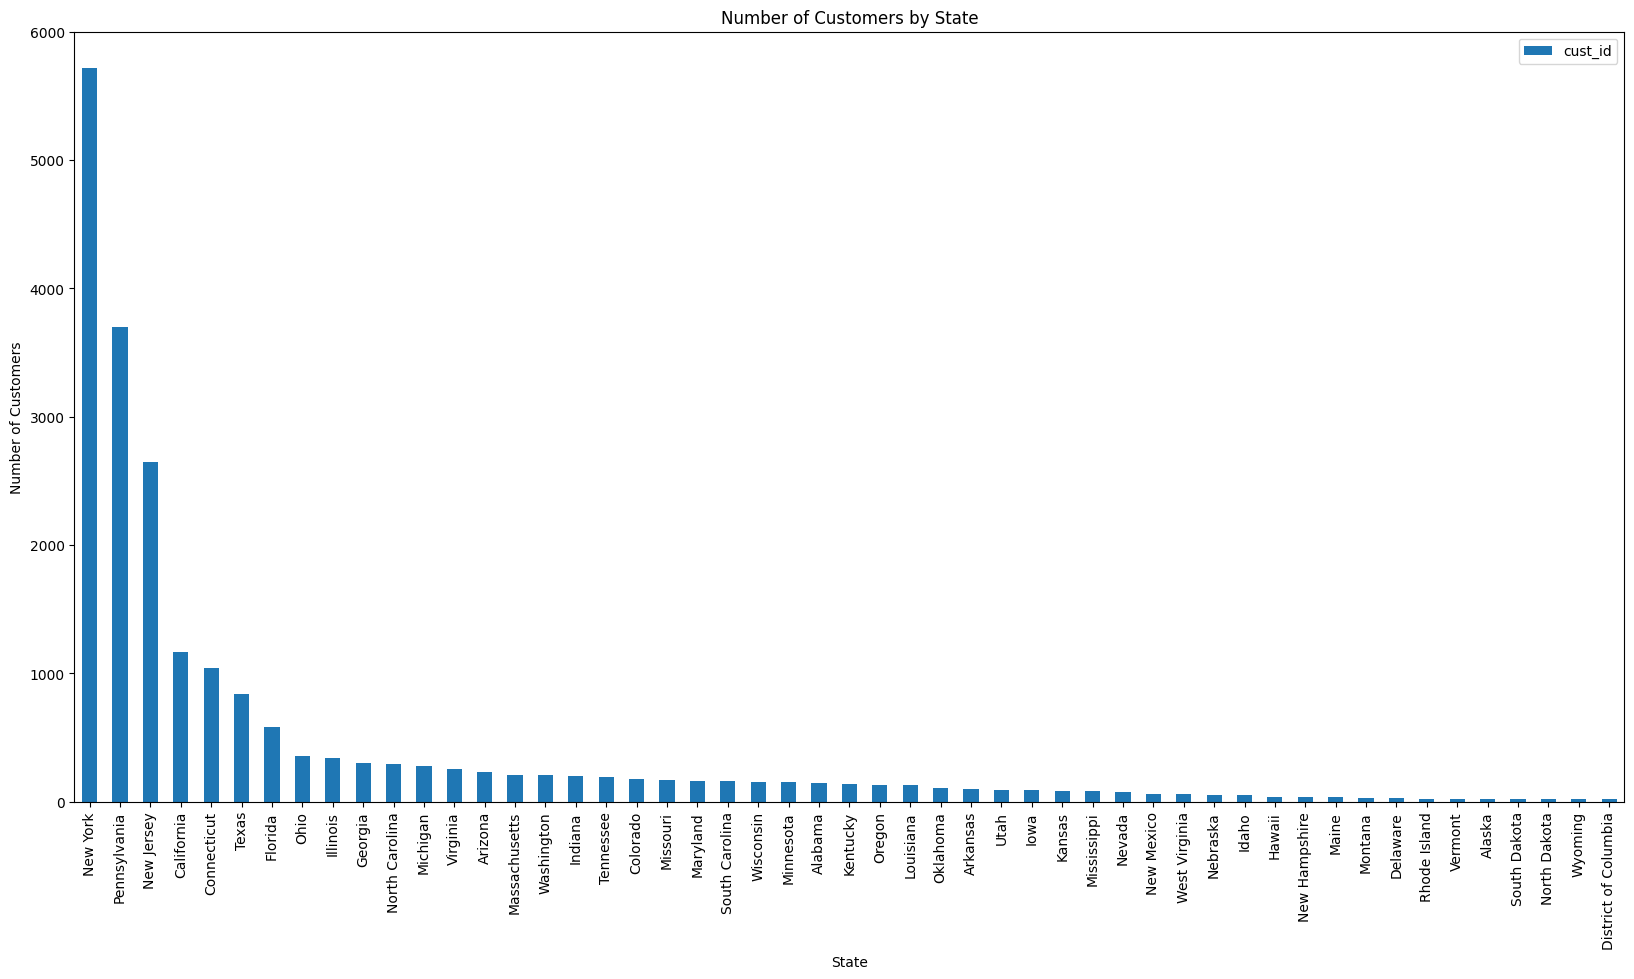

In [ ]:
# States with more unique customers 

state_counts.plot.bar(x="cust_state", y="cust_id", figsize = (20,10))

# Add a title and labels to the axes
plt.title("Number of Customers by State")
plt.xlabel("State")
plt.ylabel("Number of Customers")

# Display the plot
plt.show()

In [ ]:
# How's out total sales distributed by state? which states are the ones with more sales?
sales_by_state = df.groupby("cust_state")["total_sales"].sum().sort_values(ascending=False)
sales_by_state = sales_by_state.reset_index()
sales_by_state


,cust_state,total_sales
0,New York,443600.55
1,Pennsylvania,276173.01
2,New Jersey,197166.90
3,California,87512.89
4,Connecticut,76644.52
5,Texas,63355.13
6,Florida,46477.42
7,Ohio,24157.02
8,Illinois,23827.23
9,Georgia,23768.12


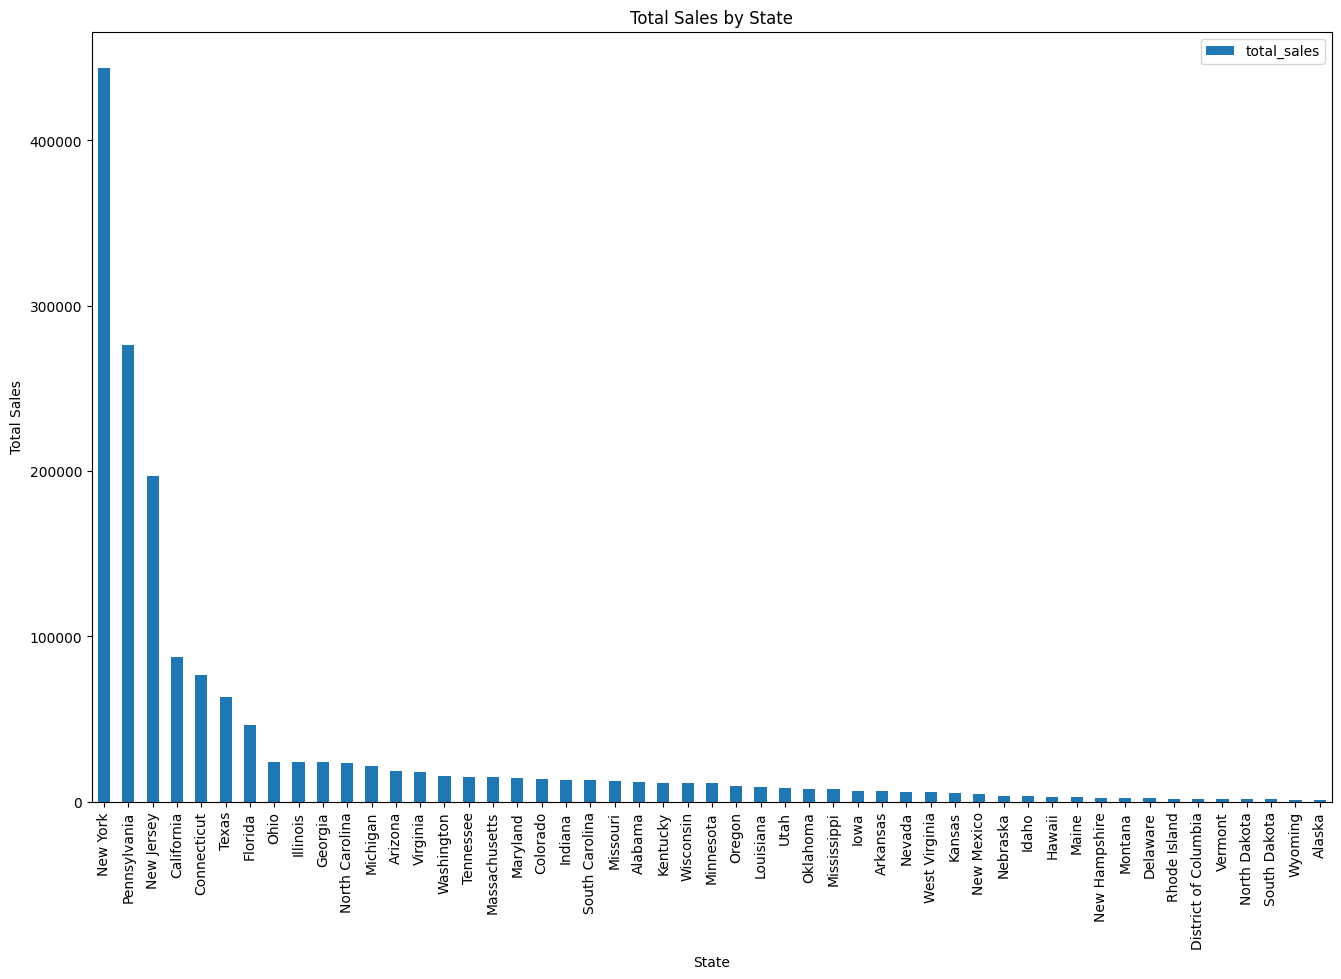

In [ ]:
sales_by_state.plot.bar(x="cust_state", y="total_sales", figsize = (16,10))

# Add a title and labels to the axes
plt.title("Total Sales by State")
plt.xlabel("State")
plt.ylabel("Total Sales")

# Display the plot
plt.show()

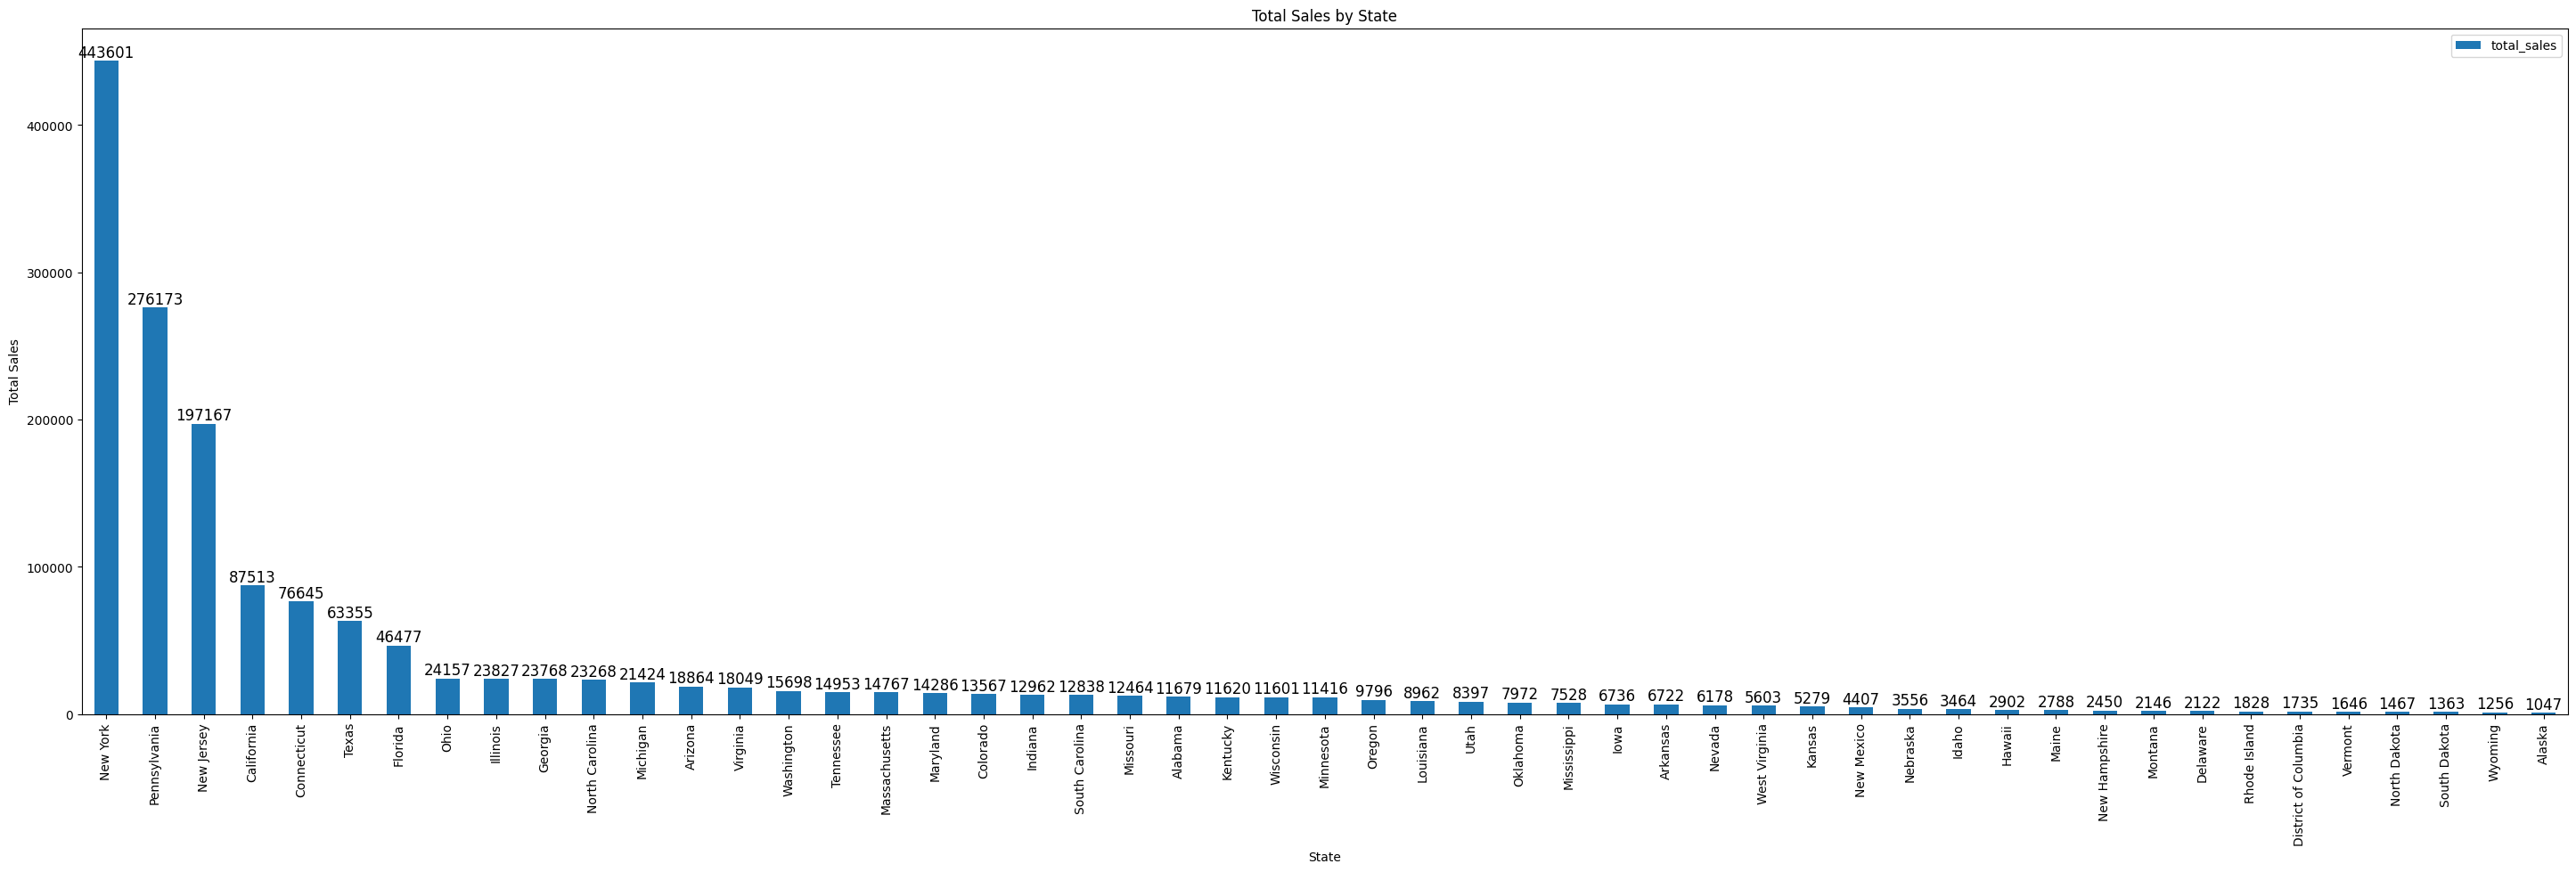

In [ ]:

# Same graph with total sales displayed by state
ax = sales_by_state.plot.bar(x="cust_state", y="total_sales", figsize= (36,10))

# Add text labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), f"{p.get_height():.0f}", 
            fontsize=12, ha="center", va="bottom")

# Add a title and labels to the axes
plt.title("Total Sales by State")
plt.xlabel("State")
plt.ylabel("Total Sales")

# Display the plot
plt.show()

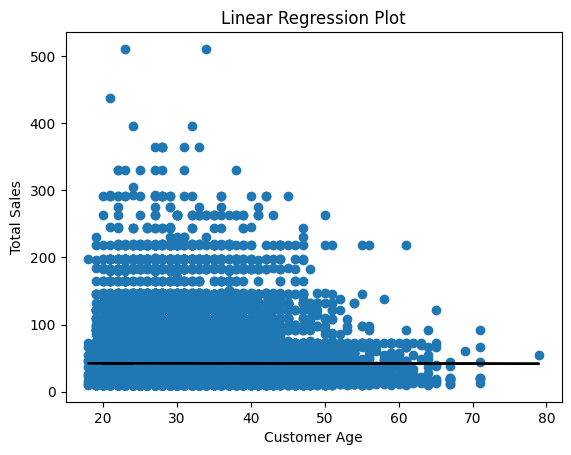

In [ ]:
# Extract the total_sales and cust_age columns
X = df['cust_age']
y = df['total_sales']

# Plot the data points
plt.scatter(X, y)

# Fit a linear regression model to the data
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.values.reshape(-1, 1), y)

# Plot the regression line
plt.plot(X, lr.predict(X.values.reshape(-1, 1)), color='k')

plt.xlabel('Customer Age')
plt.ylabel('Total Sales')
plt.title('Linear Regression Plot')

plt.show()

# NO correlation on Age and total amount spent 